# Morning training (Kristian)

In [ ]:
import pandas as pd
%matplotlib inline

spices = ['One-Hot Chili Peppers',
          'Bayesian Basil',
          'Tensor Thyme'
          'Linear Lavender',
          'Artificial Neural Nutmeg',
          'Polynomial Peppermint',
          'Sigmoid Saffron',
          'Hypepperameters'
          ]
          
participants = [2, 6, 9, 9, 9, 8, 10, 10]

combined_list=list(zip(spices,participants))
print(combined_list)

#[spices, participants]

#combined_list=[]
#for i in range(len(spices))
#   t=[spices[i],participants[i]]
#   combined_list.append(t)

#combined_list=[x,y], for x,y in zip(spices,participants)]


In [ ]:
# task2 (dictionary)
combined_dict= dict(zip(spices, participants))
combined_dict

#combined_dict=dict(combined_list)
#{x,y for x,y in zip(spices,participants)}

In [ ]:
# task3 (DataFrame)
combined_df=pd.DataFrame(combined_list)
combined_df

#combined_df=pd.DataFrame.from_dict(combined_list, orient='index')

#combined_df=pd.DataFrame(combined_list,columns['cohort','number'])

In [ ]:
# task 4 (dataframe to back to list)
combined_list2=list(combined_df)
combined_list2

#combined_list2=combined_df.values.tolist()



In [ ]:
# task 5 (dictionary to back to list of lists)

#combined_list2=list(map(list,combined_dict.items()))

combined_list2=[[x,y] for x,y in combined_dict.items()]
combined_list2

# Morning Lecture (Paul)

Data Munging / Data Wranling / Data Cleaning

* grouping
* merging
* string operations
* adding/diving columns
* concat

In [1]:
import pandas as pd
%matplotlib inline

df=pd.read_csv('pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [22]:
#df.groupby('column you would like to group')['column you would like to aggregate'].some_operation()
#df.groupby('Type 1')['Defense'].sum() # creates as pandasSeries
df.groupby('Type 1')[['Defense']].sum().head() #create as pandasDataFrame

,Defense
Type 1,
Bug,4880
Dark,2177
Dragon,2764
Electric,2917
Fairy,1117


In [8]:
df_def=df.groupby(['Type 1','Type 2'])[['Defense']].sum().sort_values(by='Defense')
df_def.head()

Defense
Type 1   Type 2          
Bug      Water         32
         Ghost         45
Ice      Psychic       50
Electric Fairy         57
Ground   Steel         60

In [28]:
# Does the average attack of all grass-type pokemon increase over generations?
#df.groupby(['Generation','Type 1'])[['Attack']].mean().sort_values(by=['Generation','Attack']).head()

#mask=df['Type 1']=='Grass' # boolean mask
#df[mask] # gives the dataframe where only mask is True!

#one line version of the 'mask' example above:
df_grass=df[df['Type 1']=='Grass']

In [29]:
df_grass.groupby('Generation')['Attack'].mean()

Generation
1    72.923077
2    57.000000
3    77.923077
4    84.000000
5    65.333333
6    82.200000
Name: Attack, dtype: float64

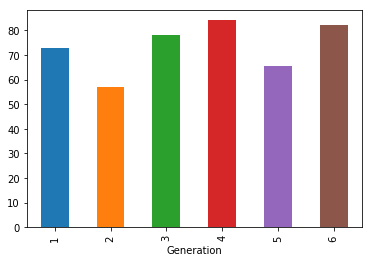

In [35]:
df_grass.groupby('Generation')['Attack'].mean().plot.bar() # since there is a only one square brackets
# bar-plot output is colorful. if we change it to double square brackets (dataframe), it is a blue output!

In [41]:
# DataFrame of the pokemons contain 'Mega' name (Also check for the wildcards)
df[df['Name'].str.contains('Mega')].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


In [45]:
#
df['Attack Plus Defense']=df['Attack']+df['Defense']


Concatenating DataFrames together
* Takes a list of dataframes and stacks them on top of eachother.
* list of DataFrames ---> [DataFrame1, DataFrame2, DataFrame3]

In [79]:
import requests
import pandas as pd

list_of_dfs=[]
for week in range(1,13): # 12+1 weeks of lectures
    p = requests.get(f'http://krspiced.pythonanywhere.com/schedule/hypepperameters/{week}', auth=('spiced', 'titanic99'))
    j = p.json()
    print(f"Successfully grabbed data for week number: {week}")
    df = pd.DataFrame({
           'day': j['weekdays'],
           'am': j['am_lectures'],
           'pm':j['pm_lectures']
           },
          index = pd.to_datetime(j['dates'])
          )
    list_of_dfs.append(df)

Successfully grabbed data for wee number: 1
Successfully grabbed data for wee number: 2
Successfully grabbed data for wee number: 3
Successfully grabbed data for wee number: 4
Successfully grabbed data for wee number: 5
Successfully grabbed data for wee number: 6
Successfully grabbed data for wee number: 7
Successfully grabbed data for wee number: 8
Successfully grabbed data for wee number: 9
Successfully grabbed data for wee number: 10
Successfully grabbed data for wee number: 11
Successfully grabbed data for wee number: 12


In [81]:
for i in list_of_dfs:
    print(i.shape)
merged_df = pd.concat(list_of_dfs)
merged_df.to_csv('SPICED_Schedule.csv')

(5, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 3)
(5, 3)


# Afternoon Lecture 